In [103]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from pandas import datetime
from statsmodels.graphics.tsaplots import plot_acf

In [104]:
# load the data using pandas build in read csv function
df = pd.read_csv('Neighborhood_Zhvi_5BedroomOrMore_Cleaned.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,268384,Outer Sunset,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,180,327437,326833,326428,...,1664812,1672311,1680390,1686108,1698464,1717293,1740056,1775783,1797970,1826847
1,274552,Mission,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,257,1076466,1074299,1076184,...,3169253,3168825,3165082,3137621,3144065,3150921,3174400,3196170,3248063,3318898
2,268383,Outer Richmond,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,386,498629,490907,485907,...,2384640,2386798,2390788,2371959,2373174,2390422,2412884,2433405,2423529,2420778
3,268219,Inner Richmond,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,460,622132,620969,618698,...,3142770,3166566,3165279,3159064,3165643,3185973,3195330,3219447,3223812,3229148
4,268396,Parkside,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,514,434797,435045,435507,...,1680948,1688684,1698388,1706044,1719534,1746760,1781381,1827800,1852037,1879630


In [105]:
df.drop(['RegionID','City','State','Metro','CountyName','SizeRank'],axis=1,inplace=True)

In [106]:
df.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,Outer Sunset,327437,326833,326428,325710,325600,326159,328160,330719,333869,...,1664812,1672311,1680390,1686108,1698464,1717293,1740056,1775783,1797970,1826847
1,Mission,1076466,1074299,1076184,1074724,1075609,1071281,1067328,1056866,1051684,...,3169253,3168825,3165082,3137621,3144065,3150921,3174400,3196170,3248063,3318898
2,Outer Richmond,498629,490907,485907,485940,486901,485059,484641,487250,491824,...,2384640,2386798,2390788,2371959,2373174,2390422,2412884,2433405,2423529,2420778
3,Inner Richmond,622132,620969,618698,617341,614763,611129,607296,606666,606679,...,3142770,3166566,3165279,3159064,3165643,3185973,3195330,3219447,3223812,3229148
4,Parkside,434797,435045,435507,436330,436815,438178,440934,443670,447590,...,1680948,1688684,1698388,1706044,1719534,1746760,1781381,1827800,1852037,1879630


In [107]:
regionName_dict = df['RegionName']
time_series_index = df.columns[1:]
date_index = []
for t in time_series_index:
    date_index.append(parser(t))

In [108]:
type(date_index[0])

datetime.datetime

In [109]:
# convert our column to panda series
OuterSunset_series = pd.DataFrame(df.iloc[0, 1:],index=date_index)

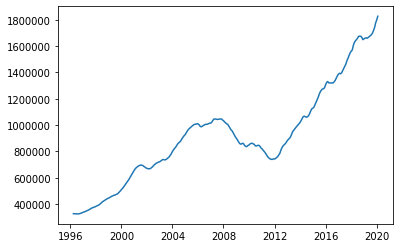

In [110]:
# Plot to see if the data is stationary, meaning variance and mean in different periods remain constant
plt.plot(OuterSunset_series)

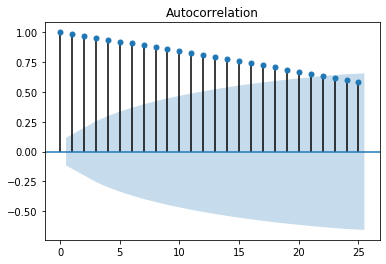

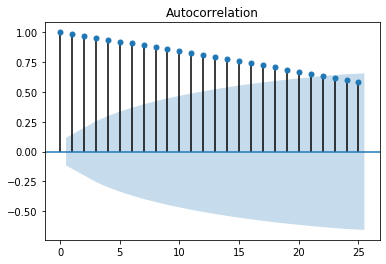

In [111]:
plot_acf(OuterSunset_series) ## not stationary

## Converting series to stationary
means mean, variance and covariance is constant over periods. 

In [112]:
# We see that the data above isn't stationary. So we will difference the data to make it stationary

In [113]:
OuterSunset_diff = OuterSunset_series.diff(periods=1) # integrated of order 1
OuterSunset_diff = OuterSunset_diff[1:]

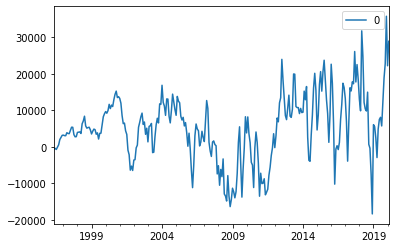

In [114]:
OuterSunset_diff.plot() # after differenced data is stationary

### Create a return series 
Construct a return series by subracting r_t from r_t-1 and divide it by r_t-1

In [139]:
shift = OuterSunset_series.shift(1)[1:]
original_series = OuterSunsent_series[1:]
returns = (original_series - shift) / original_series

In [140]:
returns 

,0
1996-05-01,-0.00184804
1996-06-01,-0.0012407
1996-07-01,-0.00220441
1996-08-01,-0.000337838
1996-09-01,0.00171389
...,...
2019-10-01,0.0109643
2019-11-01,0.0130818
2019-12-01,0.020119
2020-01-01,0.01234


In [141]:
X = returns.values
X_len = X.size

# split data into train and test
train_size = int(X.size * 0.9)
train = X[0:train_size]
test = X[train_size:]

## Autoregression model


In [118]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

#Autoregression model
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [119]:
predictions = model_ar_fit.predict(start=train_size,end=X_len)

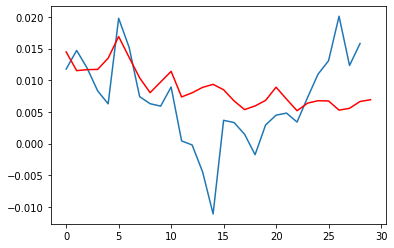

In [120]:
plt.plot(test)
plt.plot(predictions,color='red')

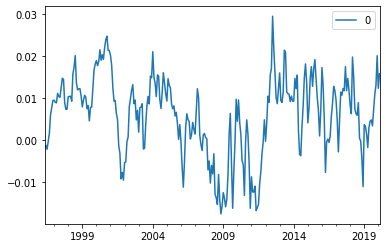

In [121]:
returns.plot()

## ARIMA

In [142]:
from statsmodels.tsa.arima_model import ARIMA

In [143]:
# p,d,q p=periods taken for autoregressive model; d -> Integrated order, difference; q=periods in moving average model
model_arima = ARIMA(train,order=(3,0,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-2133.571088226952


In [144]:
predictions1 = model_arima_fit.forecast(steps=29)[0]
predictions1

array([0.00929642, 0.00357479, 0.00357878, 0.00790532, 0.01157666,
       0.01347676, 0.01378115, 0.01300631, 0.0116641 , 0.01015007,
       0.00872479, 0.00753127, 0.00662396, 0.00599825, 0.00561565,
       0.00542283, 0.00536464, 0.00539193, 0.00546527, 0.00555594,
       0.00564507, 0.00572192, 0.00578183, 0.00582426, 0.00585115,
       0.00586558, 0.00587095, 0.00587039, 0.00586645])

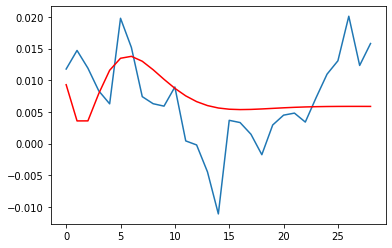

In [145]:
plt.plot(test)
plt.plot(predictions1,color='red')

In [155]:
import itertools
import warnings
warnings.filterwarnings('ignore')
p=q=range(0,5)
d=range(0,3)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 2, 0),
 (4, 2, 1),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4)]

In [147]:
scores = []
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        scores.append(model_arima_fit.aic)
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) -1653.0971097516401
(0, 0, 1) -1849.6152540709736
(0, 0, 2) -2047.446840166279
(0, 0, 3) -2070.708584155982
(0, 0, 4) -2069.376071832959
(0, 1, 0) -2024.5009094518573
(0, 1, 1) -2024.1284488452281
(0, 1, 2) -2022.9459242512964
(0, 1, 3) -2098.364096843665
(0, 1, 4) -2097.333549396315
(0, 2, 0) -1859.1195483007727
(0, 2, 1) -2008.0427632293622
(0, 2, 2) -2007.8270767911995
(0, 2, 3) -2004.2728939093022
(0, 2, 4) -2071.6474101551416
(1, 0, 0) -2043.897620262987
(1, 0, 1) -2046.587633583912
(1, 0, 2) -2076.3971760722575
(1, 0, 3) -2110.2624825764383
(1, 0, 4) -2110.151271734367
(1, 1, 0) -2023.8915378266554
(1, 1, 1) -2022.1693665842947
(1, 1, 2) -2034.2463079316346
(1, 1, 3) -2096.844321959825
(1, 1, 4) -2097.928027259406
(1, 2, 0) -1902.574944075836
(1, 2, 1) -2007.58533741581
(1, 2, 2) -2009.973131209923
(1, 2, 4) -2078.6629652689517
(2, 0, 0) -2046.7797856136895
(2, 0, 1) -2044.8512796802693
(2, 0, 2) -2081.574126822285
(2, 0, 3) -2109.1295756567183
(2, 0, 4) -2126.120819651

In [128]:
min(scores)

-2133.571088226952

## Iterate through the rows to construct time series models for all neighborhoods

In [129]:
shift = OuterSunset_series.shift(1)[1:]
original_series = OuterSunsent_series[1:]
returns = (original_series - shift) / original_series

X = returns.values
X_len = X.size

# split data into train and test
train_size = int(X.size * 0.9)
train = X[0:train_size]
test = X[train_size:]

In [130]:
original_series = df[df['RegionName'] == 'Outer Sunset']
num_rows = len(df.iloc[:,1])
name = df.iloc[row,0]
original_series = pd.DataFrame(df.iloc[row, 1:],index=date_index)
shift = original_series.shift(1)[1:]
returns = (original_series - shift) / original_series

# split data into train and test
X = returns.values
X_len = X.size
train_size = int(X.size * 0.9)
train = X[0:train_size]
test = X[train_size:]

# # a ARIMA model on the returns data
# model_arima_0s = ARIMA(train,order=(1,1,1))
# model_arima_0s_fit = model_arima.fit()
# score = model_arima_0s_fit.aic
returns

IndexError: single positional indexer is out-of-bounds

In [156]:
# import sys
# from impyute.imputation.cs import fast_knn
# sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# # start the KNN training
# imputed_training=fast_knn(train.values, k=30)

model_list = {}
num_rows = len(df.iloc[:,1])
for row in range(num_rows):
    # construct returns series from the orginal home index values' series
    name = df.iloc[row,0]
    original_series = pd.DataFrame(df.iloc[row, 1:],index=date_index)
    shift = original_series.shift(1)[1:]
    original_series = original_series[1:]
    returns = (original_series - shift) / original_series

    
    # split data into train and test
    X = returns.values
    X_len = X.size
    train_size = int(X.size * 0.9)
    train = X[0:train_size]
    test = X[train_size:]
    
    # fit a ARIMA model on the returns data
    model_arima_0s = ARIMA(train,order=(1,1,1))
    model_arima_0s_fit = model_arima.fit()
    score = model_arima_0s_fit.aic
    bestscore = [(0,0,0), score]
    for param in pdq:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        new_score = model_arima_fit.aic
        if new_score < score:
            score = new_score
            bestscore = [param, score]
    model_list[name] = bestscore
    print(name, bestscore)

    
        
        
    
    



ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.